## Generate Spectograms

### Import libraries

In [29]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile
import os



### Read the wav file

In [37]:
Fs, aud = wavfile.read('output_audio1.wav')
# select left channel only
aud = aud[:,0]


### Generate & Save Spectrum

/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7774: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


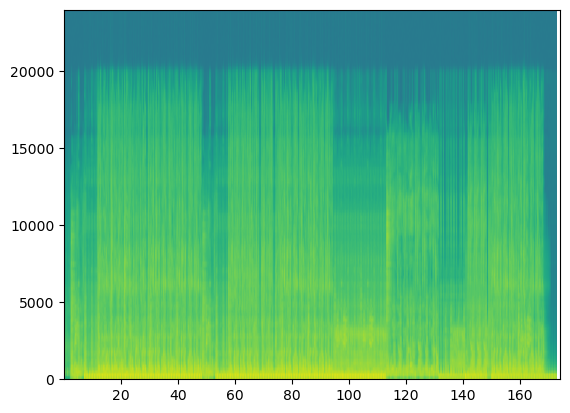

In [38]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs)
plt.savefig('specgram_plot.jpg')
plt.show()

## Embeddings using EfficentNet 

### Import libraries

In [3]:
import tensorflow as tf
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

### Load the Model 

In [4]:
#Set top = false to load the model without the FC layers (classification) 
#embeddings are extracted from the last convolutional layer of the model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16804768/16804768 [==============================] - 3s 0us/step


In [10]:
base_model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 32)         0         ['stem_bn[0][0]'

                                                                                                  
 block2b_expand_activation   (None, 56, 56, 144)          0         ['block2b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2b_dwconv (DepthwiseC  (None, 56, 56, 144)          1296      ['block2b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block2b_bn (BatchNormaliza  (None, 56, 56, 144)          576       ['block2b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block2b_a

                                                                                                  
 block3b_dwconv (DepthwiseC  (None, 28, 28, 240)          6000      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block3b_bn (BatchNormaliza  (None, 28, 28, 240)          960       ['block3b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3b_activation (Activa  (None, 28, 28, 240)          0         ['block3b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3b_s

                                                                                                  
 block4b_bn (BatchNormaliza  (None, 14, 14, 480)          1920      ['block4b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4b_activation (Activa  (None, 14, 14, 480)          0         ['block4b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4b_se_squeeze (Global  (None, 480)                  0         ['block4b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4b_s

                                                                                                  
 block5a_dwconv (DepthwiseC  (None, 14, 14, 480)          12000     ['block5a_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5a_bn (BatchNormaliza  (None, 14, 14, 480)          1920      ['block5a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5a_activation (Activa  (None, 14, 14, 480)          0         ['block5a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5a_s

                                                                                                  
 block5c_bn (BatchNormaliza  (None, 14, 14, 672)          2688      ['block5c_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5c_activation (Activa  (None, 14, 14, 672)          0         ['block5c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5c_se_squeeze (Global  (None, 672)                  0         ['block5c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block5c_s

                                                                                                  
 block6b_activation (Activa  (None, 7, 7, 1152)           0         ['block6b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6b_se_squeeze (Global  (None, 1152)                 0         ['block6b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6b_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6b_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6b_s

                                                                                                  
 block6d_bn (BatchNormaliza  (None, 7, 7, 1152)           4608      ['block6d_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6d_activation (Activa  (None, 7, 7, 1152)           0         ['block6d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6d_se_squeeze (Global  (None, 1152)                 0         ['block6d_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6d_s

### Preprocess the image

In [5]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    #Account for the batch size - required for efficentnet
    img_array = np.expand_dims(img_array, axis=0)
    # Performs standardization and normalization
    img_array = preprocess_input(img_array)
    return img_array

### Extract the embeddings

In [6]:
def extract_embeddings(image_path, model):
    img_array = preprocess_image(image_path)
    embeddings = model.predict(img_array)
    return embeddings.flatten()

### Prediction - Album Cover 

In [41]:
image_path = 'onedance.jpeg'
embeddings_album = extract_embeddings(image_path, base_model)
print(embeddings_album.shape) 
# The shape of the embeddings - 7 * 7 * 1280 (last layer)
print(embeddings_album)

1/1 [==============================] - 0s 60ms/step
(62720,)
[-0.0000000e+00 -5.1826304e-03 -1.2251039e-04 ... -3.0230368e-29
 -9.2361141e-23 -3.6327816e-12]


### Prediction - Spectograms

In [39]:
image_path = 'specgram_plot.jpg'
embeddings_spec = extract_embeddings(image_path, base_model)
print(embeddings_spec.shape) 
# The shape of the embeddings - 7 * 7 * 1280 (last layer)
print(embeddings_spec)

1/1 [==============================] - 0s 55ms/step
(62720,)
[  -0.       101.15519   -0.      ...   -0.       564.32025 1364.0457 ]


### Concatenate Embeddings

In [44]:
embeddings_album_reshaped = embeddings_album.reshape(1, -1)
embeddings_spec_reshaped = embeddings_spec.reshape(1, -1)

# Concatenate embeddings along the vertical axis (axis 0)
concatenated_embedding = np.concatenate((embeddings_album_reshaped, embeddings_spec_reshaped), axis=0)

print(concatenated_embedding)
print(concatenated_embedding.shape)

#NOT SURE ABOUT THIS PART!

[[-0.0000000e+00 -5.1826304e-03 -1.2251039e-04 ... -3.0230368e-29
  -9.2361141e-23 -3.6327816e-12]
 [-0.0000000e+00  1.0115519e+02 -0.0000000e+00 ... -0.0000000e+00
   5.6432025e+02  1.3640457e+03]]
(2, 62720)
